# Consumption data - Finland

Tests with Fingrid datasets.


<Axes: xlabel='Start time UTC'>

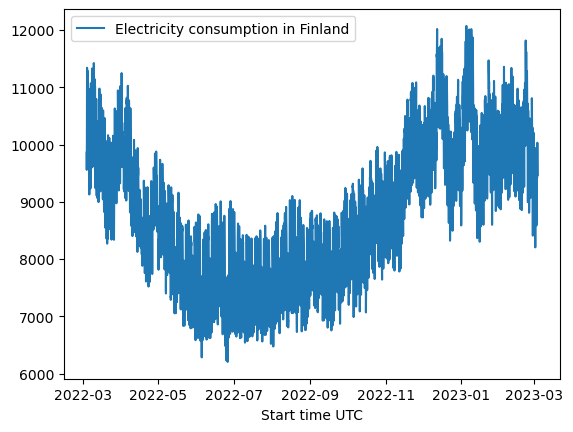

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


consumption_data = pd.read_csv(
    "data/electricity_consumption_20220303-20230303.csv",
    header=0,
    parse_dates=[0],
    index_col=0,
)

sns.lineplot(consumption_data)
# plt.show()

In [26]:
import datetime as dt
from fmiopendata.wfs import download_stored_query


def date_range(start_date, end_date, max_days):
    current_date = start_date
    while (end_date - current_date).days > max_days:
        chunk_end = current_date + dt.timedelta(days=max_days - 1)
        yield (current_date, chunk_end)
        current_date = chunk_end + dt.timedelta(days=1)
    yield (current_date, end_date)


start_date = dt.date(2024, 1, 1)
end_date = dt.date(2024, 2, 29)

weather_data = {}
for start, end in date_range(start_date, end_date, 31):
    start_string = start.strftime("%Y-%m-%d") + "T00:00:00Z"
    end_string = end.strftime("%Y-%m-%d") + "T23:59:59Z"
    data_chunk = download_stored_query(
        "fmi::observations::weather::hourly::multipointcoverage",
        [
            "place=kaisaniemi,helsinki",
            "starttime=" + start_string,
            "endtime=" + end_string,
        ],
    ).data
    weather_data.update(data_chunk)

print(dt.datetime(2024, 1, 1, 0, 0))
# print(weather_data[dt.datetime(2024, 1, 1, 0, 0)]["Helsinki Kaisaniemi"])
weather = pd.DataFrame.from_dict(
    weather_data[dt.datetime(2024, 1, 1, 0, 0)]["Helsinki Kaisaniemi"]
)
weather.describe()

2024-01-01 00:00:00


,Air temperature,Highest temperature,Lowest temperature,Relative humidity,Wind speed,Maximum wind speed,Minimum wind speed,Wind direction,Precipitation amount,Maximum precipitation intensity,Air pressure,Present weather (auto)
count,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
unique,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,-14.4,-14.1,-14.6,84.0,2.6,3.1,1.7,35.0,0.0,0.0,1020.1,0.0
freq,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
